## Importing Libraries

In [51]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import matplotlib.pyplot as plt

In [53]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book (1).csv


In [54]:
book = pd.read_csv('book.csv')

In [55]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## EXPLORATORY DATA ANALYSIS

In [56]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [57]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [59]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [60]:
book.shape

(2000, 11)

In [61]:
book.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996     True
1997     True
1998     True
1999     True
Length: 2000, dtype: bool

In [62]:
book.duplicated().sum()

1680

In [63]:
# examine duplicated rows
book.loc[book.duplicated(), :]

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
10,0,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,1,0,0,0,0
12,1,0,0,0,0,1,0,0,0,0,1
15,1,1,1,0,0,0,1,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [64]:
book = book.drop_duplicates()

In [65]:
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1956,1,0,1,0,1,0,0,0,1,0,0
1959,1,1,1,1,1,1,1,1,0,1,0
1960,1,0,1,1,1,0,0,1,1,0,1
1983,1,1,1,0,1,1,0,1,1,1,0


In [66]:
book.shape

(320, 11)

In [67]:
for i in book.columns:
  print(i)
  print(book[i].value_counts())
  print()

ChildBks
1    196
0    124
Name: ChildBks, dtype: int64

YouthBks
0    176
1    144
Name: YouthBks, dtype: int64

CookBks
1    218
0    102
Name: CookBks, dtype: int64

DoItYBks
0    163
1    157
Name: DoItYBks, dtype: int64

RefBks
1    162
0    158
Name: RefBks, dtype: int64

ArtBks
1    178
0    142
Name: ArtBks, dtype: int64

GeogBks
1    167
0    153
Name: GeogBks, dtype: int64

ItalCook
0    213
1    107
Name: ItalCook, dtype: int64

ItalAtlas
0    269
1     51
Name: ItalAtlas, dtype: int64

ItalArt
0    259
1     61
Name: ItalArt, dtype: int64

Florence
0    218
1    102
Name: Florence, dtype: int64



# Apriori Algorithm 
### model 1

In [68]:
frequent_itemsets = apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
...,...,...
152,0.106250,"(CookBks, ArtBks, DoItYBks, GeogBks)"
153,0.106250,"(CookBks, ItalCook, ArtBks, DoItYBks)"
154,0.103125,"(CookBks, ArtBks, RefBks, GeogBks)"
155,0.112500,"(CookBks, ItalCook, ArtBks, GeogBks)"


In [73]:
rules1 = association_rules(frequent_itemsets,metric='lift',min_threshold=1.0)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
1,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000
2,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
3,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
4,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384
...,...,...,...,...,...,...,...,...,...
875,"(ItalCook, ItalArt)","(CookBks, ArtBks)",0.128125,0.384375,0.128125,1.000000,2.601626,0.078877,inf
876,(CookBks),"(ItalArt, ItalCook, ArtBks)",0.681250,0.128125,0.128125,0.188073,1.467890,0.040840,1.073835
877,(ArtBks),"(CookBks, ItalCook, ItalArt)",0.556250,0.128125,0.128125,0.230337,1.797753,0.056855,1.132801
878,(ItalCook),"(CookBks, ItalArt, ArtBks)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097


In [74]:
rules2 = association_rules(frequent_itemsets,metric='lift',min_threshold=0.6).head(30)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
1,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000
2,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
3,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
4,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384
5,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921
6,(RefBks),(ChildBks),0.506250,0.612500,0.340625,0.672840,1.098513,0.030547,1.184434
7,(ChildBks),(RefBks),0.612500,0.506250,0.340625,0.556122,1.098513,0.030547,1.112356
8,(ArtBks),(ChildBks),0.556250,0.612500,0.365625,0.657303,1.073148,0.024922,1.130738
9,(ChildBks),(ArtBks),0.612500,0.556250,0.365625,0.596939,1.073148,0.024922,1.100949


In [75]:
rules3 = association_rules(frequent_itemsets,metric='lift',min_threshold=1.1)
rules3[rules3['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(ChildBks),0.334375,0.612500,0.243750,0.728972,1.190158,0.038945,1.429741
1,(ChildBks),(ItalCook),0.612500,0.334375,0.243750,0.397959,1.190158,0.038945,1.105614
2,(ItalAtlas),(ChildBks),0.159375,0.612500,0.115625,0.725490,1.184474,0.018008,1.411607
3,(ChildBks),(ItalAtlas),0.612500,0.159375,0.115625,0.188776,1.184474,0.018008,1.036242
4,(ItalArt),(ChildBks),0.190625,0.612500,0.137500,0.721311,1.177651,0.020742,1.390441
...,...,...,...,...,...,...,...,...,...
541,"(ItalCook, ItalArt)","(CookBks, ArtBks)",0.128125,0.384375,0.128125,1.000000,2.601626,0.078877,inf
542,(CookBks),"(ItalArt, ItalCook, ArtBks)",0.681250,0.128125,0.128125,0.188073,1.467890,0.040840,1.073835
543,(ArtBks),"(CookBks, ItalCook, ItalArt)",0.556250,0.128125,0.128125,0.230337,1.797753,0.056855,1.132801
544,(ItalCook),"(CookBks, ItalArt, ArtBks)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097


In [76]:
rules3.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
539,"(ItalCook, ArtBks)","(CookBks, ItalArt)",0.193750,0.146875,0.128125,0.661290,4.502402,0.099668,2.518750
538,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.146875,0.193750,0.128125,0.872340,4.502402,0.099668,6.315625
228,"(ItalCook, ArtBks)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583
532,"(CookBks, ItalCook, ArtBks)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583
545,(ItalArt),"(CookBks, ItalCook, ArtBks)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062
233,(ItalArt),"(ItalCook, ArtBks)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062
544,(ItalCook),"(CookBks, ItalArt, ArtBks)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097
533,"(CookBks, ItalArt, ArtBks)",(ItalCook),0.146875,0.334375,0.128125,0.872340,2.608869,0.079014,5.214062
192,(ItalCook),"(CookBks, ItalArt)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097
189,"(CookBks, ItalArt)",(ItalCook),0.146875,0.334375,0.128125,0.872340,2.608869,0.079014,5.214062


In [77]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(ChildBks),0.334375,0.612500,0.243750,0.728972,1.190158,0.038945,1.429741
1,(ChildBks),(ItalCook),0.612500,0.334375,0.243750,0.397959,1.190158,0.038945,1.105614
2,(ItalAtlas),(ChildBks),0.159375,0.612500,0.115625,0.725490,1.184474,0.018008,1.411607
3,(ChildBks),(ItalAtlas),0.612500,0.159375,0.115625,0.188776,1.184474,0.018008,1.036242
4,(ItalArt),(ChildBks),0.190625,0.612500,0.137500,0.721311,1.177651,0.020742,1.390441
...,...,...,...,...,...,...,...,...,...
541,"(ItalCook, ItalArt)","(CookBks, ArtBks)",0.128125,0.384375,0.128125,1.000000,2.601626,0.078877,inf
542,(CookBks),"(ItalArt, ItalCook, ArtBks)",0.681250,0.128125,0.128125,0.188073,1.467890,0.040840,1.073835
543,(ArtBks),"(CookBks, ItalCook, ItalArt)",0.556250,0.128125,0.128125,0.230337,1.797753,0.056855,1.132801
544,(ItalCook),"(CookBks, ItalArt, ArtBks)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097


## VISUALIZATION for Model 1

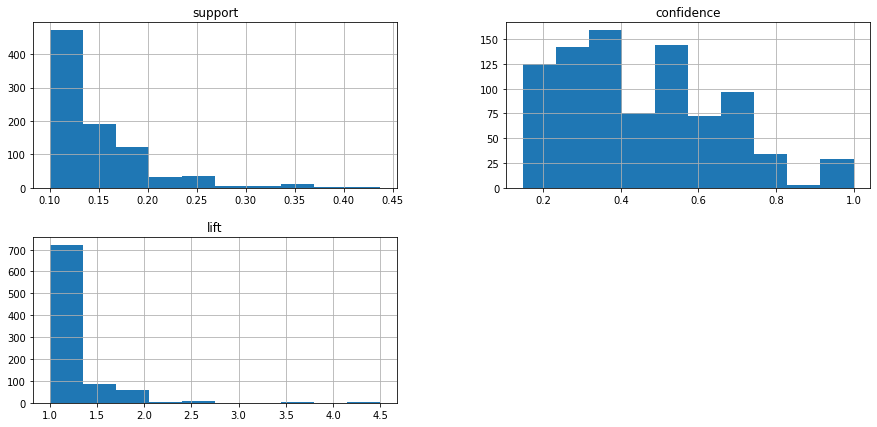

In [78]:
import matplotlib.pyplot as plt
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

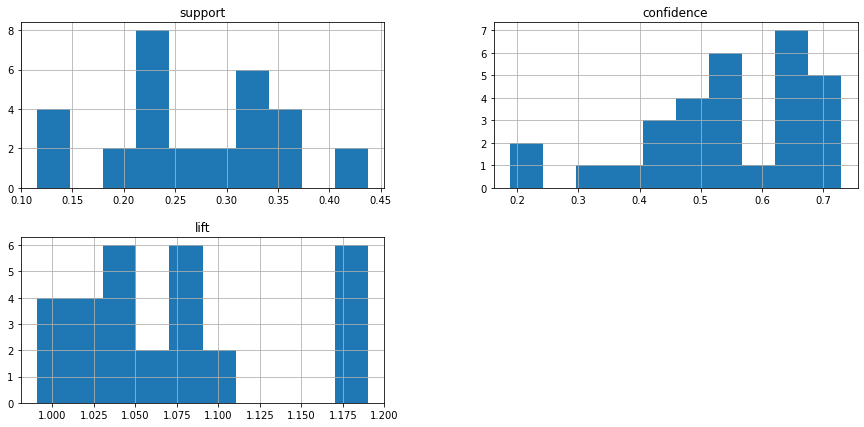

In [79]:
import matplotlib.pyplot as plt
rules2[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

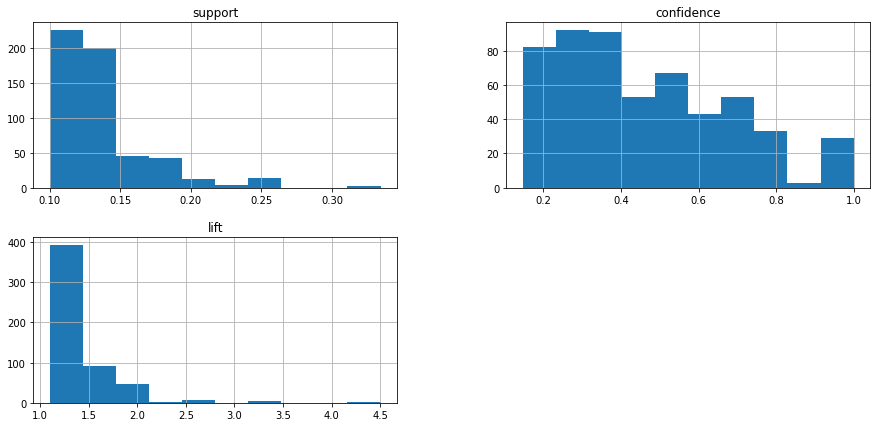

In [80]:
import matplotlib.pyplot as plt
rules3[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

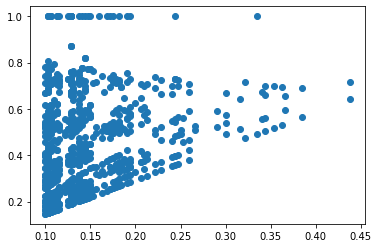

In [83]:
plt.scatter(rules1['support'], rules1['confidence'])
plt.show()

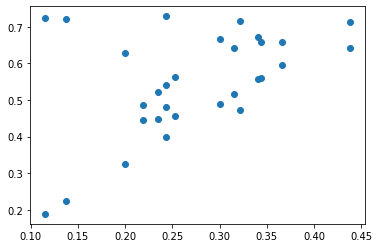

In [85]:
plt.scatter(rules2['support'], rules2['confidence'])
plt.show()

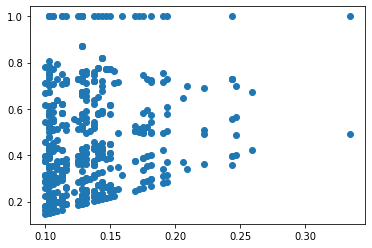

In [86]:
plt.scatter(rules3['support'], rules3['confidence'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


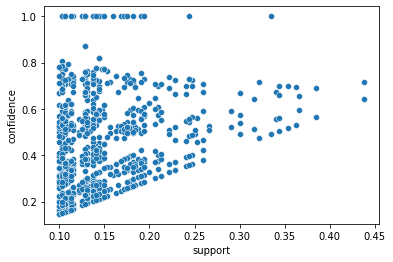

In [87]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules1,)

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


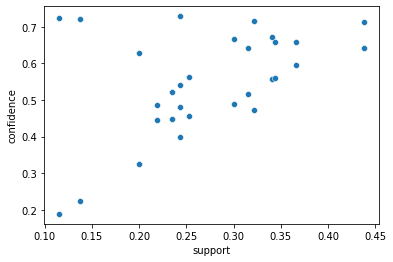

In [88]:
sns.scatterplot('support', 'confidence', data=rules2,)

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


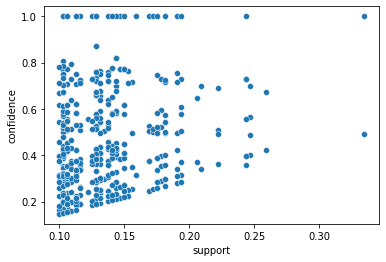

In [89]:
sns.scatterplot('support', 'confidence', data=rules3,)

plt.show()

# Apriori Algorithm 
### model 2

In [90]:
frequent_itemsets2 = apriori(book,min_support=0.3,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
7,0.334375,(ItalCook)
8,0.318750,(Florence)
9,0.300000,"(YouthBks, ChildBks)"


In [91]:
rules4 = association_rules(frequent_itemsets2,metric='lift',min_threshold=1.0)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
1,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000
2,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
3,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
4,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384
5,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921
6,(RefBks),(ChildBks),0.506250,0.612500,0.340625,0.672840,1.098513,0.030547,1.184434
7,(ChildBks),(RefBks),0.612500,0.506250,0.340625,0.556122,1.098513,0.030547,1.112356
8,(ArtBks),(ChildBks),0.556250,0.612500,0.365625,0.657303,1.073148,0.024922,1.130738
9,(ChildBks),(ArtBks),0.612500,0.556250,0.365625,0.596939,1.073148,0.024922,1.100949


In [93]:
rules5 = association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
1,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000
2,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
3,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
4,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384
5,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921
6,(RefBks),(ChildBks),0.506250,0.612500,0.340625,0.672840,1.098513,0.030547,1.184434
7,(ChildBks),(RefBks),0.612500,0.506250,0.340625,0.556122,1.098513,0.030547,1.112356
8,(ArtBks),(ChildBks),0.556250,0.612500,0.365625,0.657303,1.073148,0.024922,1.130738
9,(ChildBks),(ArtBks),0.612500,0.556250,0.365625,0.596939,1.073148,0.024922,1.100949


## VISUALIZATION for Model 2

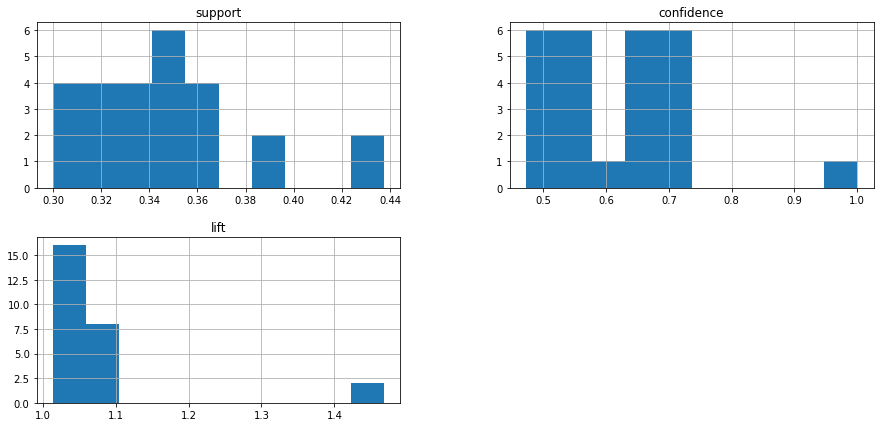

In [94]:
import matplotlib.pyplot as plt
rules4[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

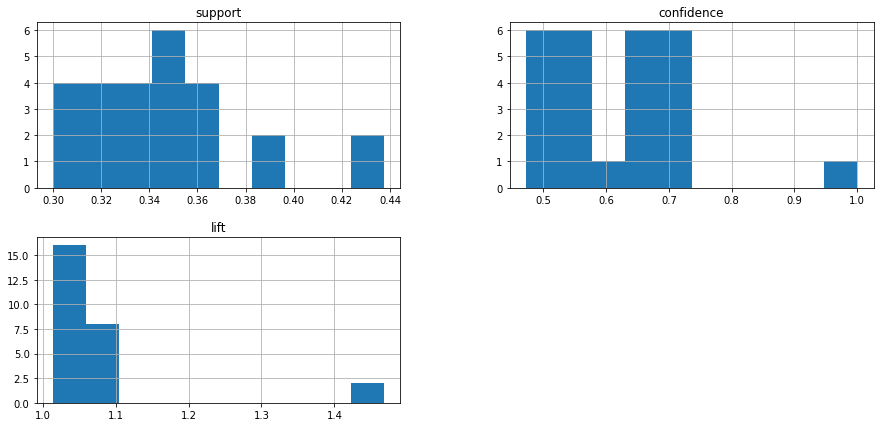

In [98]:
import matplotlib.pyplot as plt
rules5[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


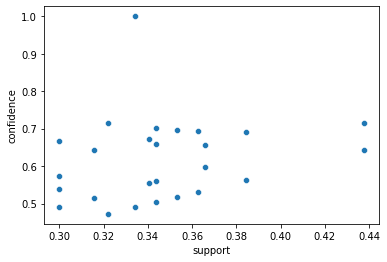

In [96]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules4,)

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


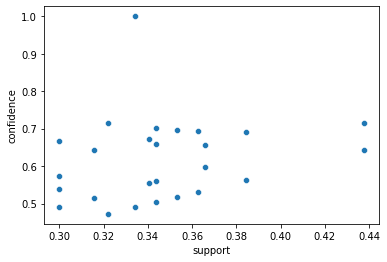

In [97]:
sns.scatterplot('support', 'confidence', data=rules5,)

plt.show()